<a href="https://colab.research.google.com/github/FaizaanAthar/Netflix/blob/main/Netflix_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Basic Analysis**

**Un-nesting the**

Un-nest the columns those have cells with multiple comma separated values by
creating multiple rows

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Reading the DataFrame and print head
df = pd.read_csv("2Netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Retriving the information of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# checking the data type of Dataframe
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
#checking the null value in every column
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#un-nesting the directors column
#To creating separate lines for each director of the Title
constraint1=df['director'].apply(lambda x:str(x).split(', ' )).tolist()
df_new1=pd.DataFrame(constraint1,index=df['title'])
df_new1=df_new1.stack()
df_new1=pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns={0:'Directors'},inplace=True)
df_new1.drop(['level_1'],axis=1,inplace=True)
df_new1.head(10)

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
5,Midnight Mass,Mike Flanagan
6,My Little Pony: A New Generation,Robert Cullen
7,My Little Pony: A New Generation,JosÃ© Luis Ucha
8,Sankofa,Haile Gerima
9,The Great British Baking Show,Andy Devonshire


In [ ]:
#un-nesting the Cast column
#To creating separate lines for each cast of the Title
constraint2=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_new2=pd.DataFrame(constraint2,index=df['title'])
df_new2=df_new2.stack()
df_new2=pd.DataFrame(df_new2.reset_index())
df_new2.rename(columns={0:'cast'},inplace=True)
df_new2.drop(['level_1'],axis=1,inplace=True)
df_new2.head()


,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [ ]:
#un-nesting the Listed_in column
#To creating separate lines for each cast of the Title
constraint3=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_new3=pd.DataFrame(constraint3,index=df['title'])
df_new3=df_new3.stack()
df_new3=pd.DataFrame(df_new3.reset_index())
df_new3.rename(columns={0:'Genre'},inplace=True)
df_new3.drop(['level_1'],axis=1,inplace=True)
df_new3.head()

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [ ]:
#un-nesting the country column
#To creating separate lines for each cast of the Title
constraint4=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df_new4=pd.DataFrame(constraint4,index=df['title'])
df_new4=df_new4.stack()
df_new4=pd.DataFrame(df_new4.reset_index())
df_new4.rename(columns={0:'country'},inplace=True)
df_new4.drop(['level_1'],axis=1,inplace=True)
df_new4.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


**Handling null values**



1.   For categorical variables with null values, update those rows as unknown_column_name.
2.   Replace with 0 for continuous variables having null values.




In [ ]:
#merging all the above unnested data and than replacing nan values of director and actor by Unknown Actor and Director
df_new5=df_new2.merge(df_new1,on=['title'],how='inner')
df_new6=df_new5.merge(df_new3,on=['title'],how='inner')
df_new=df_new6.merge(df_new4,on=['title'],how='inner')
df_new['cast'].replace(['nan'],['Unknown Actor'],inplace=True)
df_new['Directors'].replace(['nan'],['Unknown Director'],inplace=True)
df_new['country'].replace(['nan'],[np.nan],inplace=True)
df_new.head()

,title,cast,Directors,Genre,country
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa


In [ ]:
# merging the final with initial dataframe on title
df_final=df_new.merge(df[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration']],on=['title'],how='left')
df_final.head()

,title,cast,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
#Check the info of final data
df_final. isnull().sum()

title               0
cast                0
Directors           0
Genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
dtype: int64

In [ ]:
df_final.loc[df_final['duration'].isnull()].head()

,title,cast,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
126537,Louis C.K. 2017,Louis C.K.,Louis C.K.,Movies,United States,s5542,Movie,"April 4, 2017",2017,74 min,NaN
131603,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,Movies,United States,s5795,Movie,"September 16, 2016",2010,84 min,NaN
131737,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,Movies,United States,s5814,Movie,"August 15, 2016",2015,66 min,NaN


In [ ]:
# As per the info we have observ that in [country],[data_added],[rating] and [duration] has some null values
# So duration null value is filled will the rating value as they were mistaken capture in rating column
df_final.loc[df_final['duration'].isnull(),'duration']=df_final.loc[df_final['duration'].isnull(),'duration'].fillna(df_final['rating'])
df_final.loc[df_final['rating'].str.contains('min',na=False),'rating']='NR'
df_final.isnull().sum()

title               0
cast                0
Directors           0
Genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            0
dtype: int64

In [ ]:
df_final.loc[df_final['rating'].isnull()].head()

,title,cast,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
135125,13TH: A Conversation with Oprah Winfrey & Ava ...,Oprah Winfrey,Unknown Director,Movies,NaN,s5990,Movie,"January 26, 2017",2017,NaN,37 min
135126,13TH: A Conversation with Oprah Winfrey & Ava ...,Ava DuVernay,Unknown Director,Movies,NaN,s5990,Movie,"January 26, 2017",2017,NaN,37 min
154377,Gargantia on the Verdurous Planet,Kaito Ishikawa,Unknown Director,Anime Series,Japan,s6828,TV Show,"December 1, 2016",2013,NaN,1 Season
154378,Gargantia on the Verdurous Planet,Kaito Ishikawa,Unknown Director,International TV Shows,Japan,s6828,TV Show,"December 1, 2016",2013,NaN,1 Season
154379,Gargantia on the Verdurous Planet,Hisako Kanemoto,Unknown Director,Anime Series,Japan,s6828,TV Show,"December 1, 2016",2013,NaN,1 Season


In [ ]:
df_final.loc[df_final['rating'].str.contains('min',na=False),'rating']='NR'
df_final['rating'].fillna('NR',inplace=True)


In [ ]:
for i in df_final[df_final['date_added'].isnull()]['release_year'].unique():
    imp=df_final[df_final['release_year']==i]['date_added'].mode().values[0]
    df_final.loc[df_final['release_year']==i,'date_added']=df_final.loc[df_final['release_year']==i,'date_added'].fillna(imp)

In [ ]:
for i in df_final[df_final['country'].isnull()]['Directors'].unique():
    if i in df_final[~df_final['country'].isnull()]['Directors'].unique():
        imp=df_final[df_final['Directors']==i]['country'].mode().values[0]
        df_final.loc[df_final['Directors']==i,'country']=df_final.loc[df_final['Directors']==i,'country'].fillna(imp)

In [ ]:
for i in df_final[df_final['country'].isnull()]['cast'].unique():
    if i in df_final[~df_final['country'].isnull()]['cast'].unique():
        imp=df_final[df_final['cast']==i]['country'].mode().values[0]
        df_final.loc[df_final['cast']==i,'country']=df_final.loc[df_final['cast']==i,'country'].fillna(imp)

#If there are still nulls, I just replace it by Unknown Country
df_final['country'].fillna('Unknown Country',inplace=True)
df_final.isnull().sum()

title           0
cast            0
Directors       0
Genre           0
country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

# **What does ‘good’ look like?**

Find the counts of each categorical variable both using graphical and nongraphical
analysis.


1.   For Non-graphical Analysis:
2.   For graphical analysis:



In [ ]:
df_final.head()

,title,cast,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
df_final['duration'].value_counts()

1 Season     35035
2 Seasons     9559
3 Seasons     5084
94 min        4343
106 min       4040
             ...  
3 min            4
5 min            3
11 min           2
8 min            2
9 min            2
Name: duration, Length: 220, dtype: int64

In [ ]:
#removing min from data
df_final['duration']=df_final['duration'].str.replace(" min","")
df_final.head()

,title,cast,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
df_final['duration'].unique()

array(['90', '2 Seasons', '1 Season', '91', '125', '9 Seasons', '104',
       '127', '4 Seasons', '67', '94', '5 Seasons', '161', '61', '166',
       '147', '103', '97', '106', '111', '3 Seasons', '110', '105', '96',
       '124', '116', '98', '23', '115', '122', '99', '88', '100',
       '6 Seasons', '102', '93', '95', '85', '83', '113', '13', '182',
       '48', '145', '87', '92', '80', '117', '128', '119', '143', '114',
       '118', '108', '63', '121', '142', '154', '120', '82', '109', '101',
       '86', '229', '76', '89', '156', '112', '107', '129', '135', '136',
       '165', '150', '133', '70', '84', '140', '78', '7 Seasons', '64',
       '59', '139', '69', '148', '189', '141', '130', '138', '81', '132',
       '10 Seasons', '123', '65', '68', '66', '62', '74', '131', '39',
       '46', '38', '8 Seasons', '17 Seasons', '126', '155', '159', '137',
       '12', '273', '36', '34', '77', '60', '49', '58', '72', '204',
       '212', '25', '73', '29', '47', '32', '35', '71', '149', '

In [ ]:
df_final['duration_copy']=df_final['duration'].copy()
df_final1=df_final.copy()

In [ ]:
df_final1.loc[df_final1['duration_copy'].str.contains('Season'),'duration_copy']=0
df_final1['duration_copy']=df_final1['duration_copy'].astype('int')
df_final1.head()

,title,cast,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0


In [ ]:
df_final1['duration_copy'].describe()

count    201991.000000
mean         77.152789
std          52.269154
min           0.000000
25%           0.000000
50%          95.000000
75%         112.000000
max         312.000000
Name: duration_copy, dtype: float64

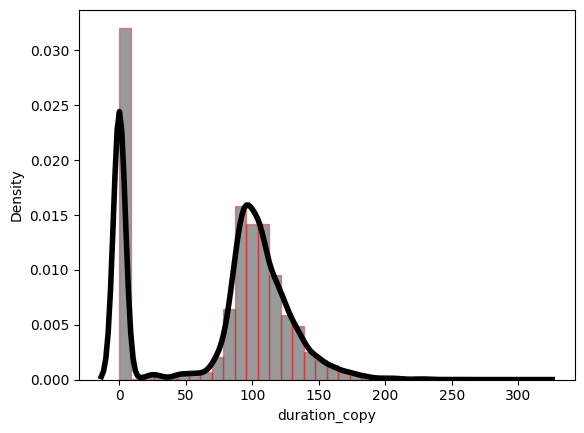

In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.distplot(df_final1['duration_copy'],hist=True,kde=True,
             bins=int(36),color='black',hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth':4})
plt.show()

In [ ]:
bins1=[-1,1,50,80,100,120,150,200,315]
labels1 = ['<1','1-50','50-80','80-100','100-120','120-150','150-200','200-315']
df_final1['duration_copy']=pd.cut(df_final1['duration_copy'],bins=bins1,labels=labels1)
df_final1.head()

,title,cast,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,80-100
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1


In [ ]:
df_final1.loc[~df_final1['duration'].str.contains('Season'),'duration']=df_final1.loc[~df_final1['duration'].str.contains('Season'),'duration_copy']
df_final1.drop(['duration_copy'],axis=1,inplace=True)
df_final1.head()

,title,cast,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
df_final1['duration'].value_counts()

80-100        52937
100-120       48724
1 Season      35035
120-150       26691
2 Seasons      9559
50-80          7700
150-200        6737
3 Seasons      5084
1-50           2530
4 Seasons      2134
5 Seasons      1698
7 Seasons       843
6 Seasons       633
200-315         524
8 Seasons       286
9 Seasons       257
10 Seasons      220
13 Seasons      132
12 Seasons      111
15 Seasons       96
17 Seasons       30
11 Seasons       30
Name: duration, dtype: int64

In [ ]:
from datetime import datetime
from dateutil.parser import parse
arr=[]
for i in df_final1['date_added'].values:
    dt1=parse(i)
    arr.append(dt1.strftime('%Y-%m-%d'))
df_final1['Modified_Added_date']=arr
df_final1['Modified_Added_date']=pd.to_datetime(df_final1['Modified_Added_date'])
df_final1['month_added']=df_final1['Modified_Added_date'].dt.month
df_final1['week_Added']=df_final1['Modified_Added_date'].dt.week
df_final1['year']=df_final1['Modified_Added_date'].dt.year
df_final1.head()

,title,cast,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021


**Titles such as Bahubali(Hindi Version),Bahubali(Tamil Version) were there. Since it's only one movie in different languages**

In [ ]:
# Titles such as Bahubali(Hindi Version),
# Bahubali(Tamil Version) were there.
# Since it's only one movie in different languages,
# presence of brackets and content between brackets is removed.

df_final['title']=df_final1['title'].str.replace(r"\(.*\)","")
df_final1.head()

,title,cast,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021


In [ ]:
#no. of distinct titles on the basis of genre
df_final1.groupby(['Genre']).agg({"title":"nunique"})

,title
Genre,
Action & Adventure,859
Anime Features,71
Anime Series,176
British TV Shows,253
Children & Family Movies,641
Classic & Cult TV,28
Classic Movies,116
Comedies,1674
Crime TV Shows,470


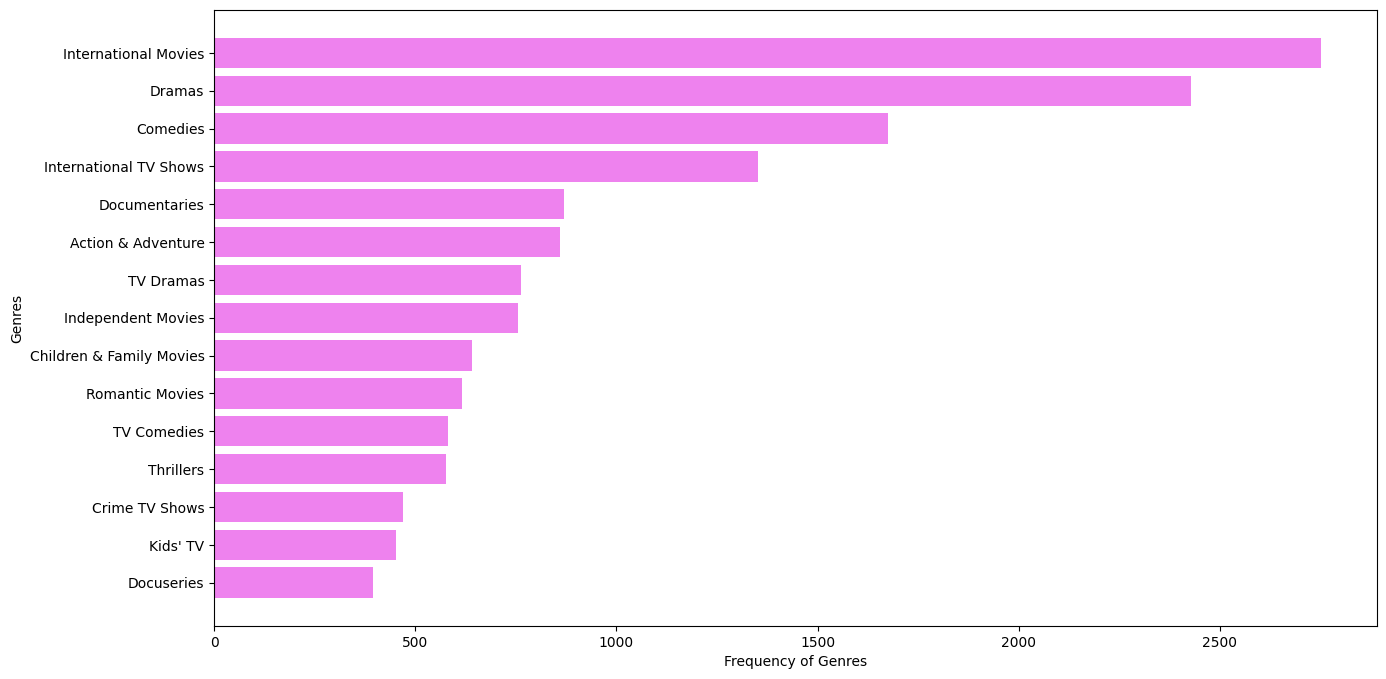

In [ ]:
df_genre=df_final1.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'],df_genre[::-1]['title'],color=['violet'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

In [ ]:
#number of distinct titles on the basis of type
df_final1.groupby(['type']).agg({"title":'nunique'})

,title
type,
Movie,6131
TV Show,2676


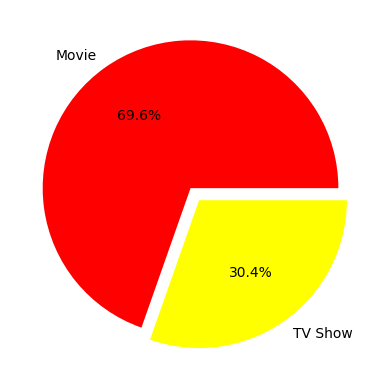

In [ ]:
df_type=df_final1.groupby(['type']).agg({"title":"nunique"}).reset_index()
plt.pie(df_type['title'],explode=(0.05,0.05),labels=df_type['type'],colors=['red','yellow'],autopct='%.1f%%')
plt.show()

**We have 70:30 ratio of Movies and TV Shows in our data**

In [ ]:
#number of distinct titles on the basis of country
df_final1.groupby(['country']).agg({"title":"nunique"})

,title
country,
,3
Afghanistan,1
Albania,1
Algeria,3
Angola,2
...,...
Vatican City,1
Venezuela,4
Vietnam,7


In [ ]:
df_final1['country']=df_final1['country'].str.replace(',','')
df_final1.head()

,title,cast,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021


In [ ]:
#number of distinct titles on the basis of country
df_final1.groupby(['country']).agg({"title":"nunique"})

,title
country,
,3
Afghanistan,1
Albania,1
Algeria,3
Angola,2
...,...
Vatican City,1
Venezuela,4
Vietnam,7


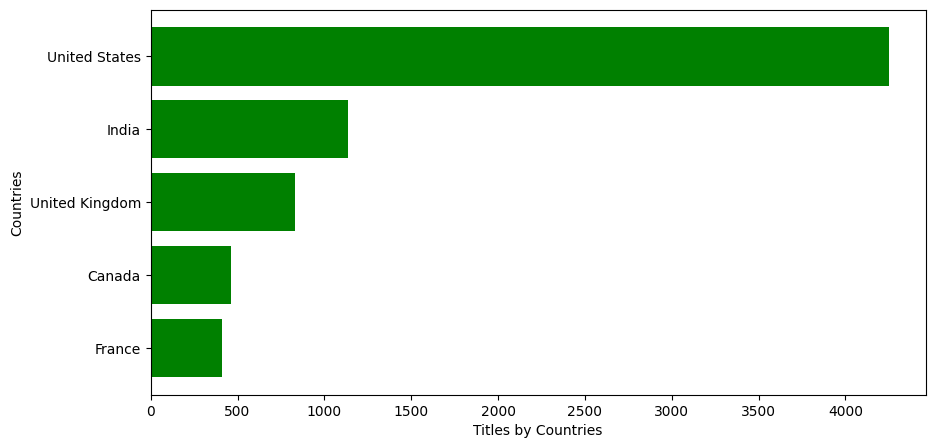

In [ ]:
df_country=df_final1.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:5]
plt.figure(figsize=(10,5))
plt.barh(df_country[::-1]['country'],df_country[::-1]['title'],color=['green'])
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

**US,India,UK,Canada and France are leading countries in Content Creation on Netflix**

In [ ]:
#number of distinct titles on the basis of Actors
df_final1.groupby(['cast']).agg({"title":"nunique"})

,title
cast,
Jr.,2
"""Riley"" Lakdhar Dridi",1
'Najite Dede,2
2 Chainz,1
2Mex,1
...,...
Åževket Ã‡oruh,1
Åžinasi Yurtsever,3
ÅžÃ¼kran OvalÄ±,1


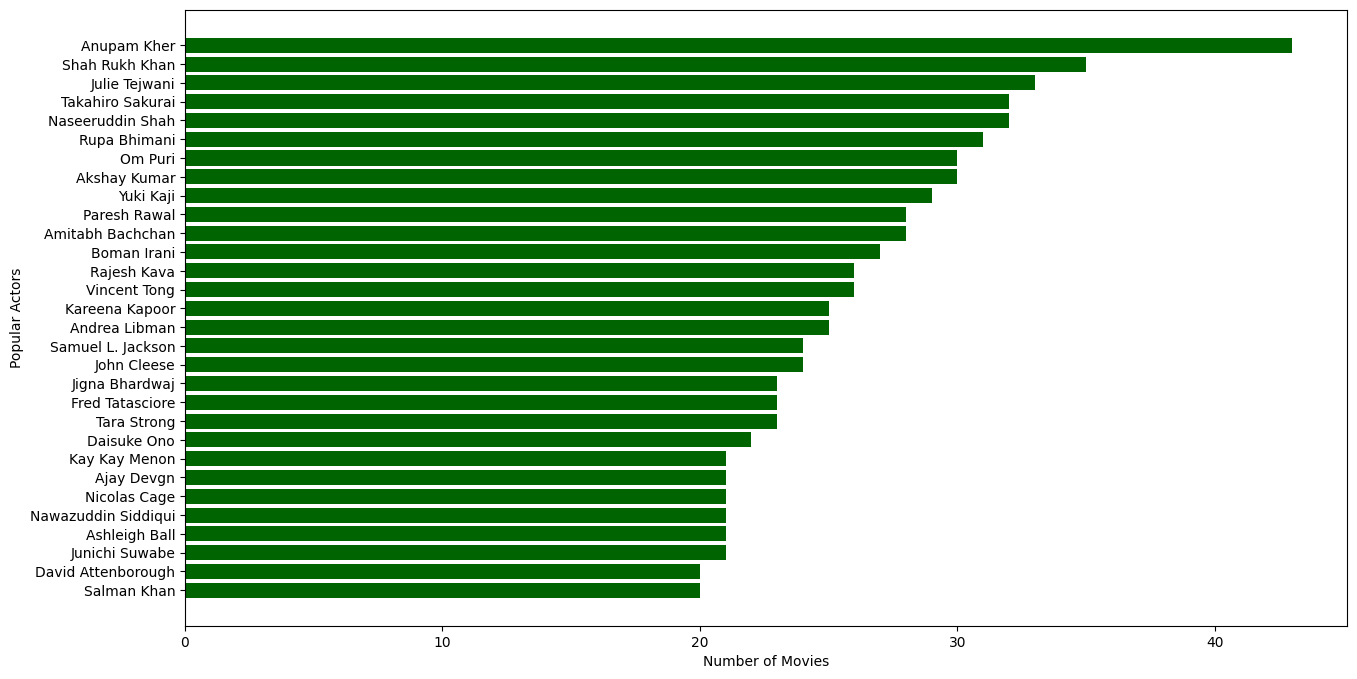

In [ ]:
df_actors=df_final1.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_actors=df_actors[df_actors['cast']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['darkgreen'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

**Anupam Kher,SRK,Julie Tejwani, Naseeruddin Shah and Takahiro Sakurai occupy the top stop in Most Watched content.**

In [ ]:
#number of distinct titles on the basis of Directors
df_final1.groupby(['Directors']).agg({"title":"nunique"})

,title
Directors,
A. L. Vijay,2
A. Raajdheep,1
A. Salaam,1
A.R. Murugadoss,2
Aadish Keluskar,1
...,...
Ã‰ric Judor,1
Ã‰ric Toledano,1
Ã‰ric Warin,1


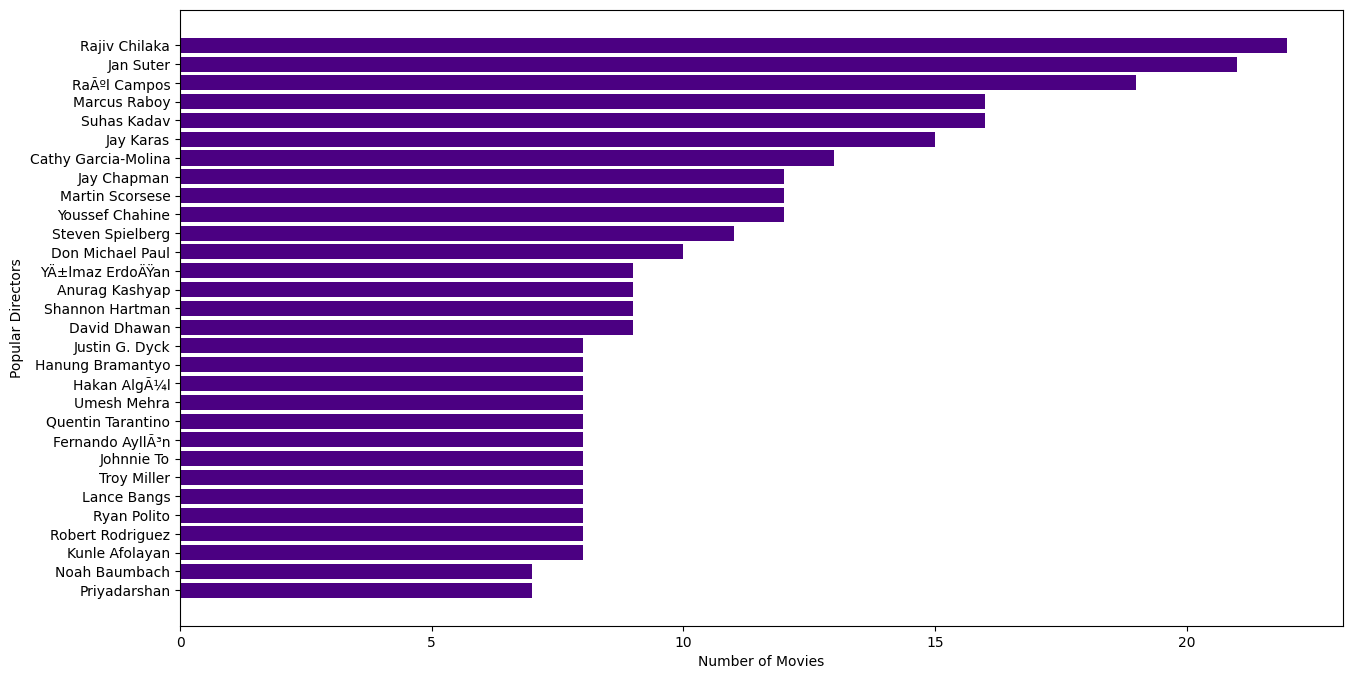

In [ ]:
df_directors=df_final1.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

**Rajiv Chilaka, Jan Suter and Raul Campos are the most popular directors across Netflix**

In [ ]:
#number of distinct titles on the basis of year
df_final1.groupby(['release_year']).agg({"title":"nunique"})

,title
release_year,
1925,1
1942,2
1943,3
1944,3
1945,4
...,...
2017,1032
2018,1147
2019,1030


# **Comparison of tv shows vs. movies.**

1.   Find the number of movies produced in each country and pick the top 10
countries.
2.   Find the number of Tv-Shows produced in each country and pick the top 10
countries.








In [ ]:
df_shows=df_final1[df_final1['type']=='TV Show']
df_movies=df_final1[df_final1['type']=='Movie']

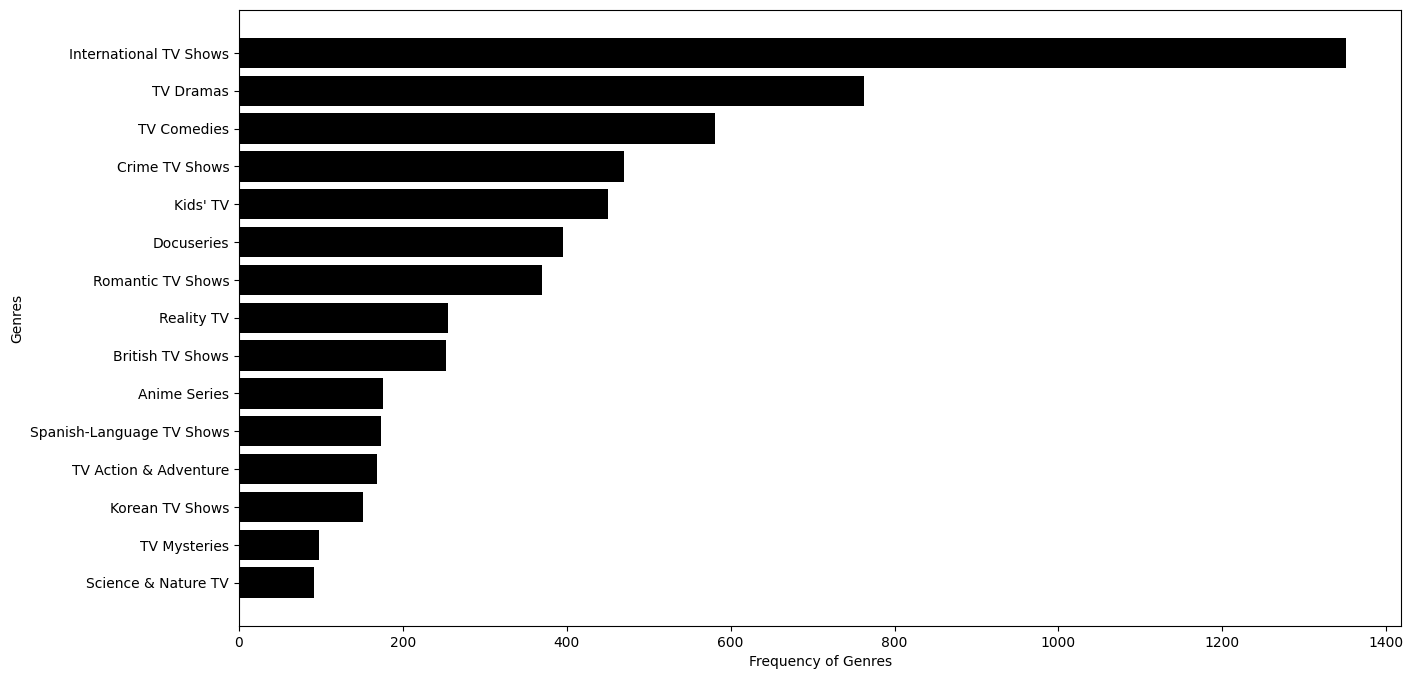

In [ ]:
df_genre=df_shows.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['black'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

**International TV Shows, Dramas and Comedy Genres are popular across TV Shows in Netflix**

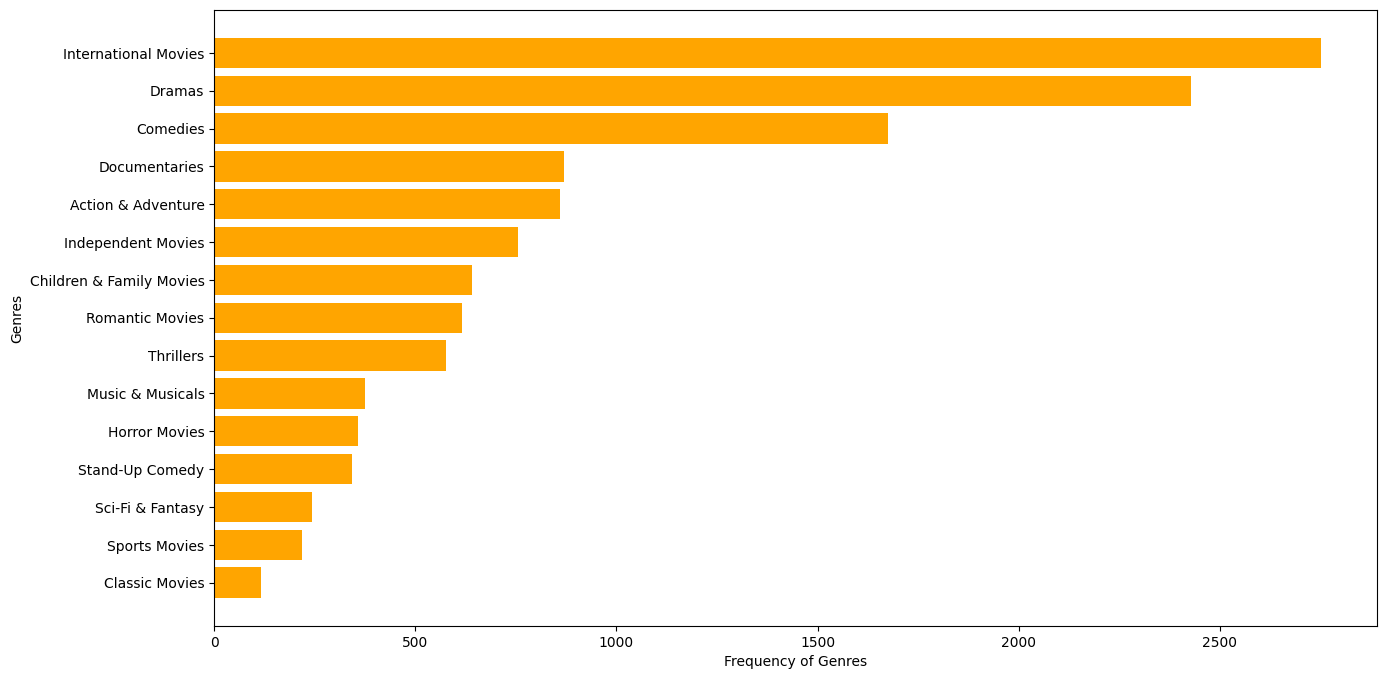

In [ ]:
df_genre=df_movies.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:15]
plt.figure(figsize=(15,8))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

**International Movies, Dramas and Comedy Genres are popular followed by Documentaries across Movies on Netflix**

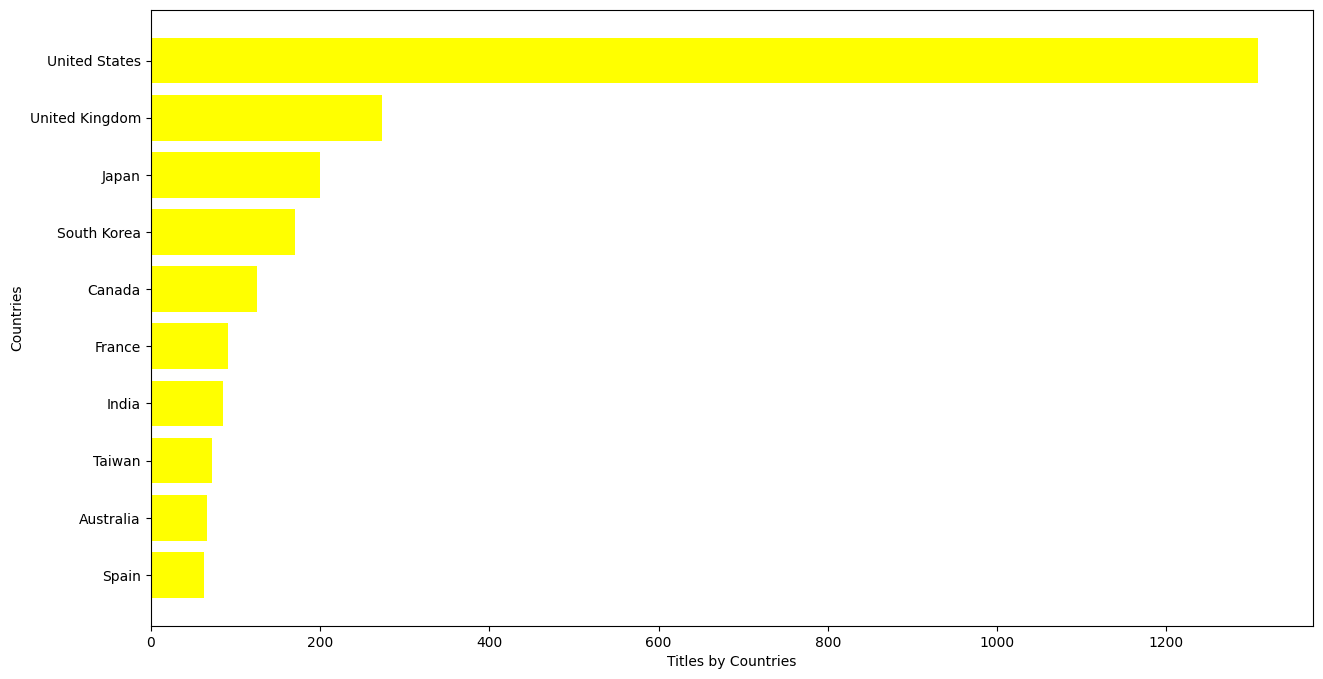

In [ ]:
df_country=df_shows.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_country[::-1]['country'], df_country[::-1]['title'],color=['yellow'])
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

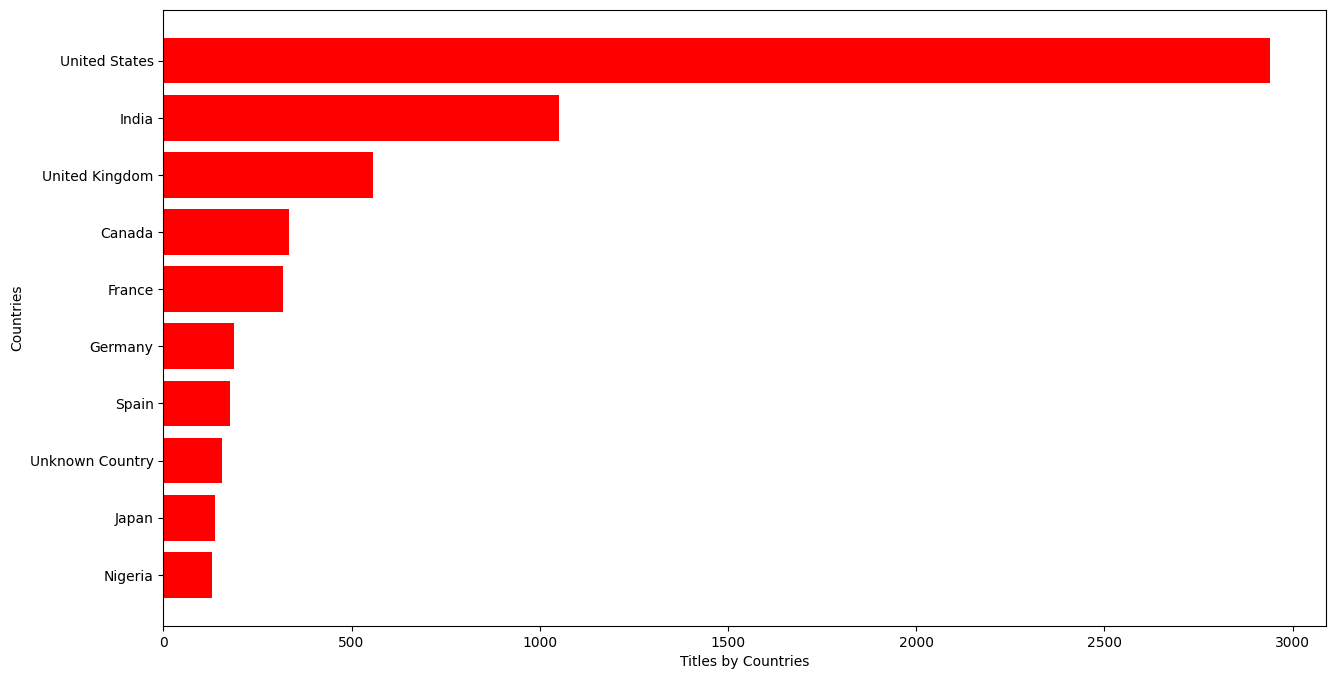

In [ ]:
df_country=df_movies.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:10]
plt.figure(figsize=(15,8))
plt.barh(df_country[::-1]['country'], df_country[::-1]['title'],color=['red'])
plt.xlabel('Titles by Countries')
plt.ylabel('Countries')
plt.show()

# **What is the best time to launch a TV show?**

1.   Find which is the best week to release the Tv-show or the movie. Do the analysis
separately for Tv-shows and Movies
2.  Find which is the best month to release the Tv-show or the movie. Do the
analysis separately for Tv-shows and Movies






In [ ]:
df_final1.groupby(['week_Added']).agg({"title":"nunique"})

,title
week_Added,
1,372
2,108
3,113
4,88
5,208
6,97
7,147
8,110
9,254


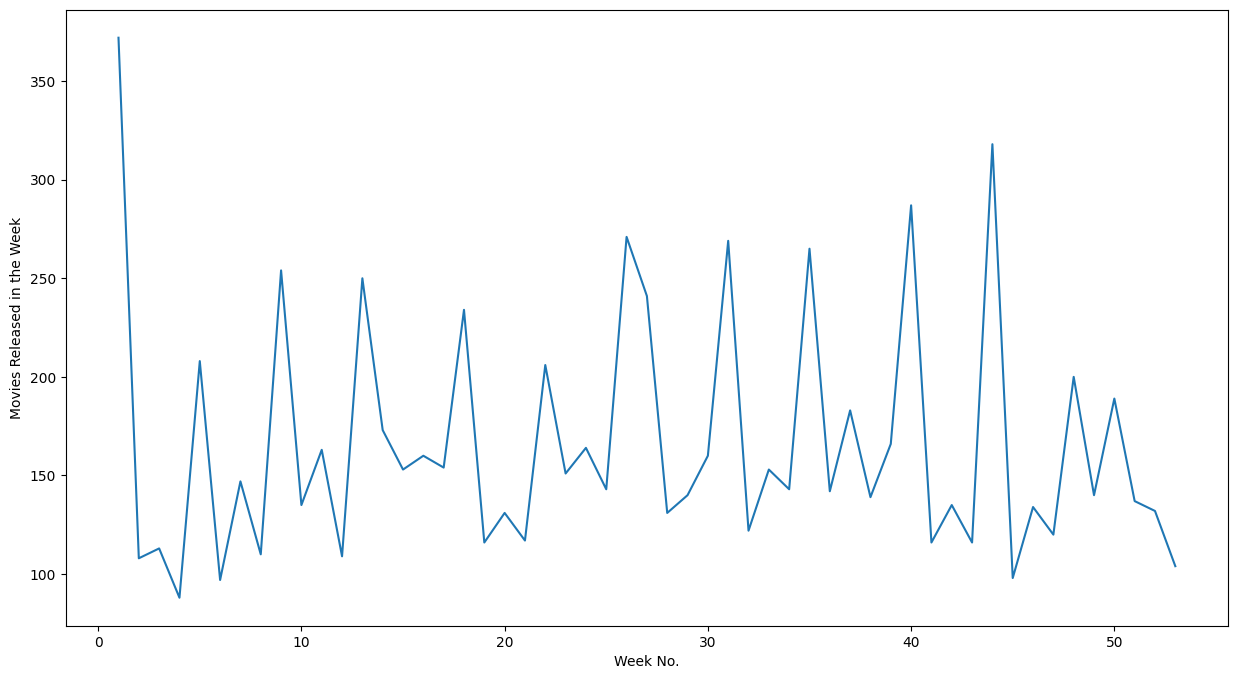

In [ ]:
df_week=df_final1.groupby(['week_Added']).agg({"title":"nunique"}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_week, x='week_Added', y='title')
plt.ylabel("Movies Released in the Week")
plt.xlabel("Week No.")
plt.show()

In [ ]:
df_final1.groupby(['month_added']).agg({"title":"nunique"})

,title
month_added,
1,738
2,563
3,742
4,765
5,632
6,728
7,832
8,756
9,772


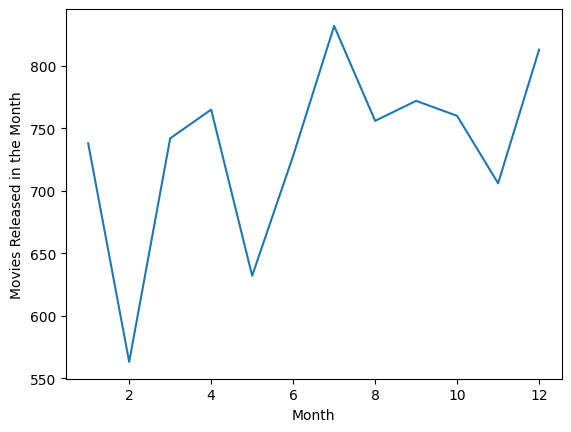

In [ ]:
df_month=df_final1.groupby(['month_added']).agg({"title":"nunique"}).reset_index()
sns.lineplot(data=df_month, x='month_added', y='title')
plt.ylabel("Movies Released in the Month")
plt.xlabel("Month")
plt.show()

# **Analysis of actors/directors of different types of shows/movies.**

1.  Identify the top 10 actor who have appeared in most movies or TV shows.
2.   Identify the top 10 directors who have appeared in most movies or TV shows.


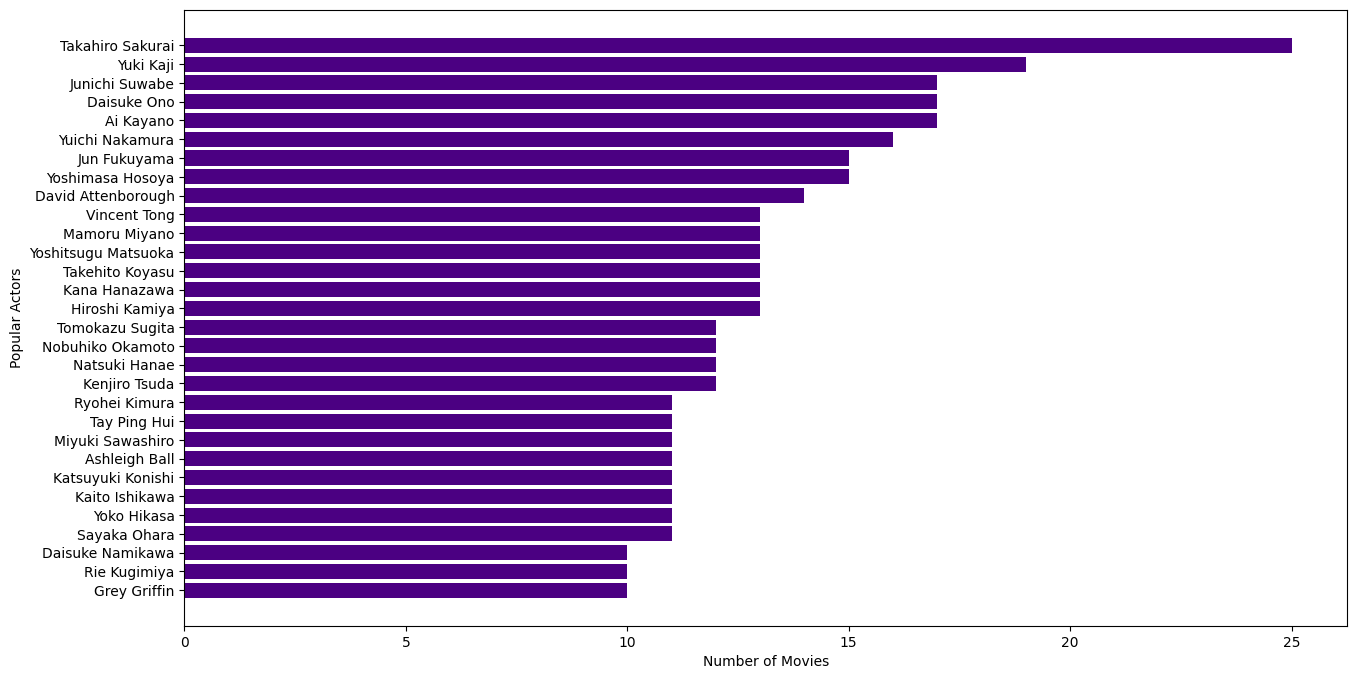

In [ ]:
# TV_show
df_actors=df_shows.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_actors=df_actors[df_actors['cast']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

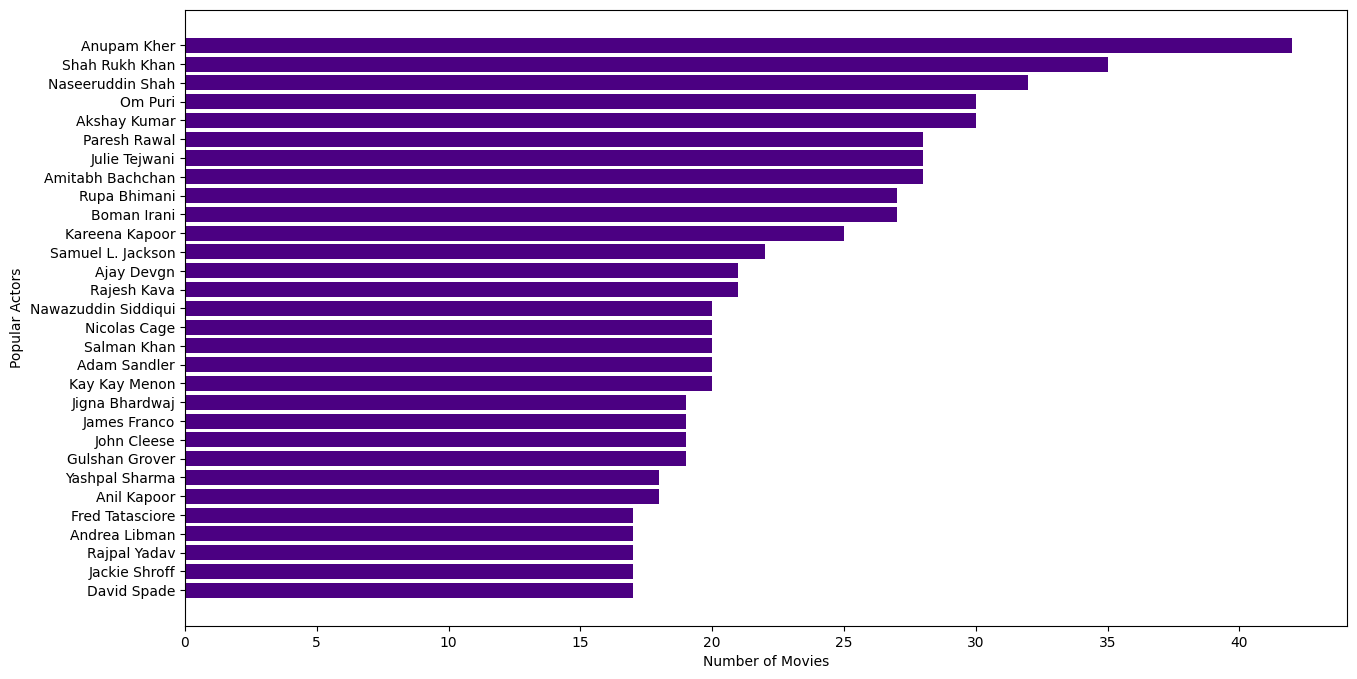

In [ ]:
#BOLLYWOOD_Actors
df_actors=df_movies.groupby(['cast']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_actors=df_actors[df_actors['cast']!='Unknown Actor']
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]['cast'], df_actors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Actors')
plt.show()

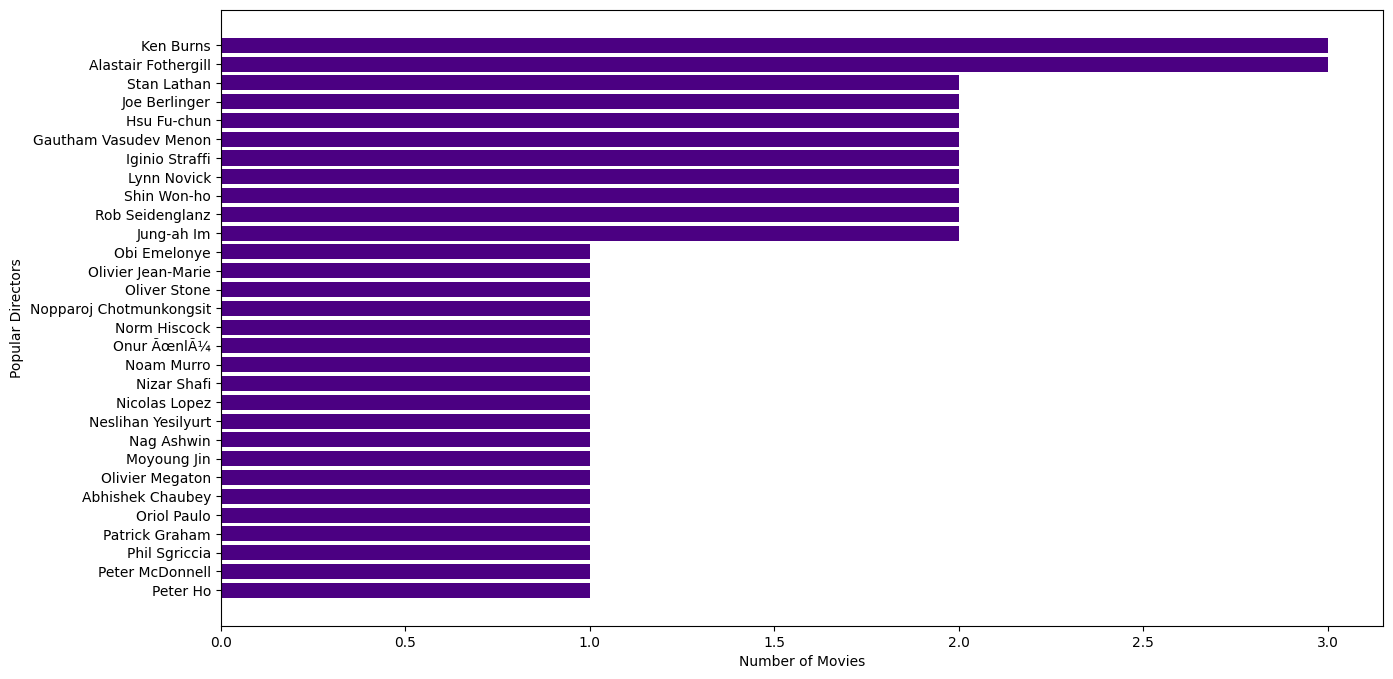

In [ ]:
#Director
df_directors=df_shows.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

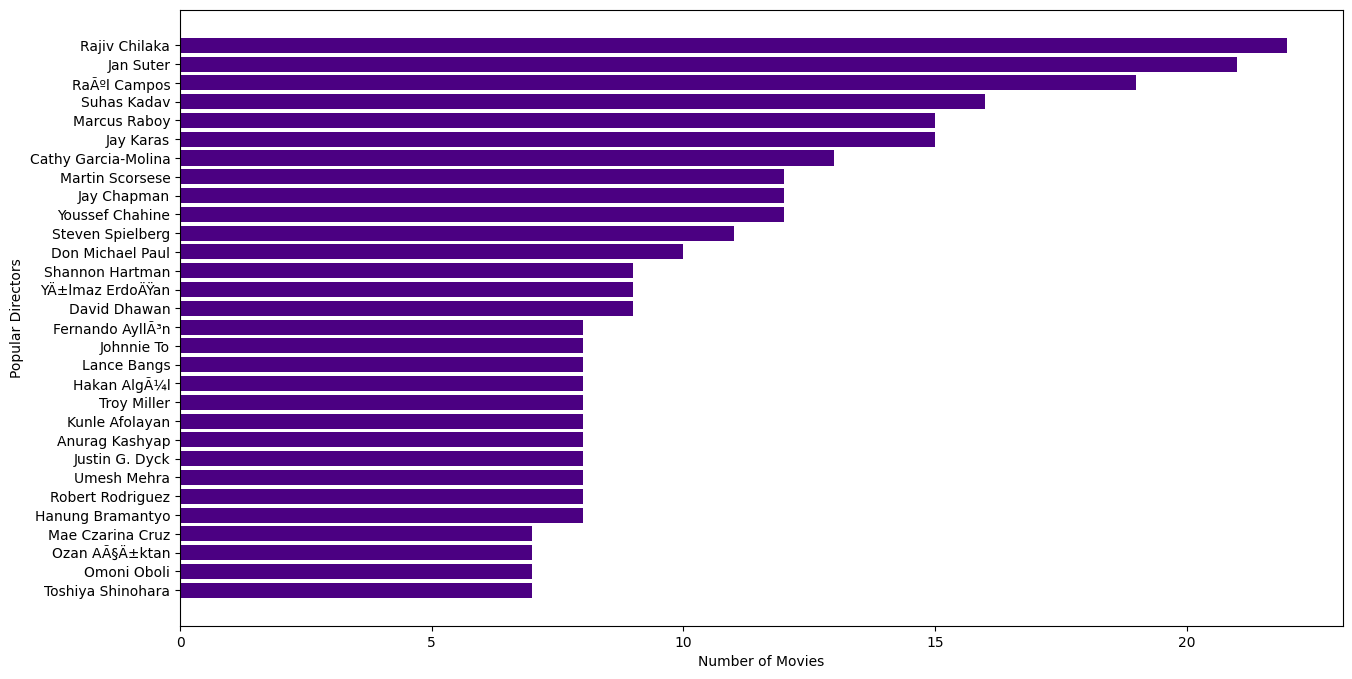

In [ ]:
df_directors=df_movies.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values(by=['title'],ascending=False)[:31]
df_directors=df_directors[df_directors['Directors']!='Unknown Director']
plt.figure(figsize=(15,8))
plt.barh(df_directors[::-1]['Directors'], df_directors[::-1]['title'],color=['indigo'])
plt.xlabel('Number of Movies')
plt.ylabel('Popular Directors')
plt.show()

# **Which genre movies are more popular or produced more**

In [ ]:
df_final1.head()

,title,cast,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,Modified_Added_date,month_added,week_Added,year
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,38,2021
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,38,2021


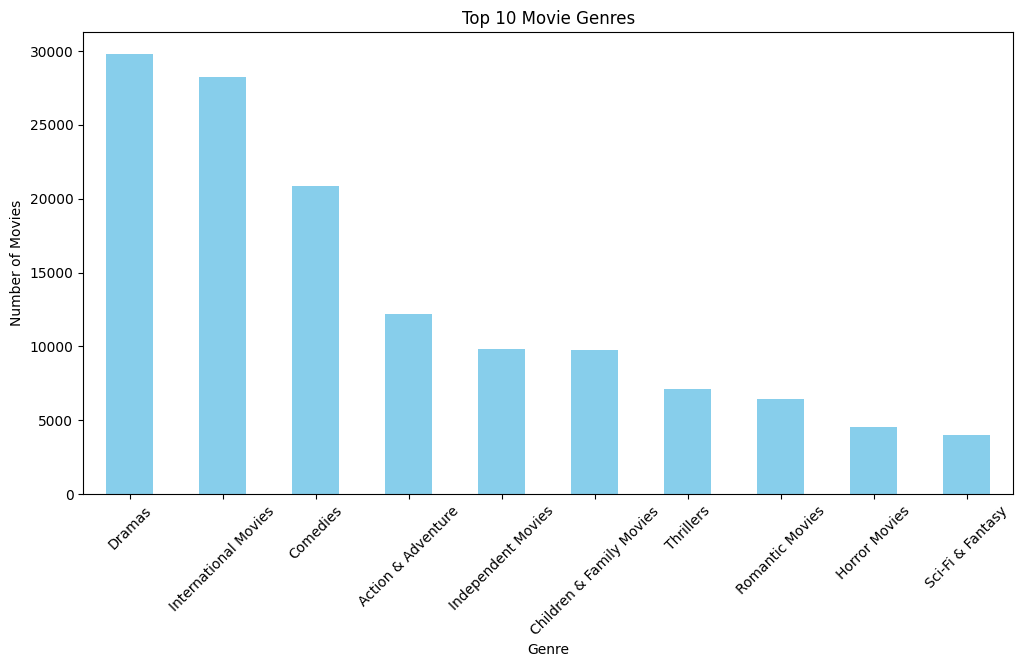

In [ ]:
genre_counts = df_final1[df_final1['type'] == 'Movie']['Genre'].value_counts()

# Sort the genres based on the count in descending order
genre_counts = genre_counts.sort_values(ascending=False)

# Select the top N genres to display
top_n = 10  # You can change this value to show more or fewer genres

# Plot the most popular genres
plt.figure(figsize=(12, 6))
genre_counts.head(top_n).plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

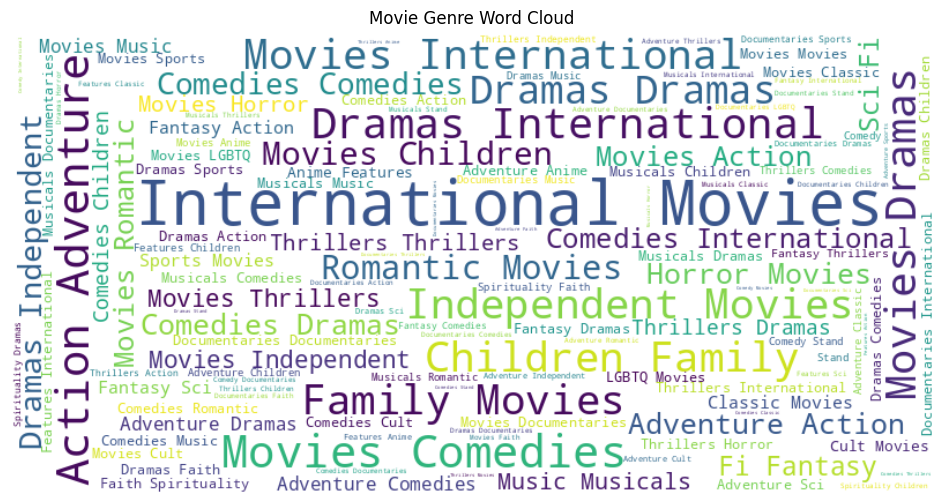

In [ ]:
from wordcloud import WordCloud

# Assuming your dataset is loaded into 'df'

# Filter the dataset to include only movies
movies_df = df_final1[df_final1['type'] == 'Movie']

# Extract the 'genre' column
genres = movies_df['Genre']

# Combine all genre values into a single string
genre_text = ' '.join(genres)

# Create a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genre_text)

# Plot the WordCloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Movie Genre Word Cloud')
plt.show()

In [ ]:
df_final1['date_added'] = pd.to_datetime(df_final1['date_added'])

# Calculate the difference in days between 'date_added' and 'release_year'
df_final1['days_to_netflix'] = (df_final1['date_added'] - pd.to_datetime(df_final1['release_year'], format='%Y')).dt.days

# Find the mode of the calculated differences
mode_days = df_final1['days_to_netflix'].mode().values[0]

print(f"The mode of days between movie release and Netflix addition is {mode_days} days.")

The mode of days between movie release and Netflix addition is 547 days.


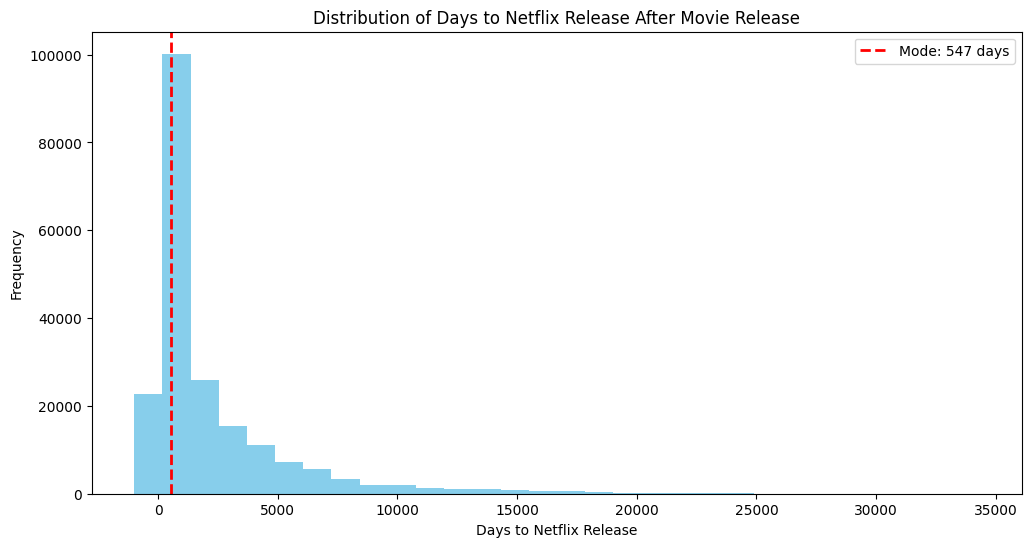

In [ ]:
df_final1['date_added'] = pd.to_datetime(df_final1['date_added'])

# Calculate the difference in days between 'date_added' and 'release_year'
df_final1['days_to_netflix'] = (df_final1['date_added'] - pd.to_datetime(df_final1['release_year'], format='%Y')).dt.days

# Find the mode of the calculated differences
mode_days = df_final1['days_to_netflix'].mode().values[0]

# Plot a histogram of the differences
plt.figure(figsize=(12, 6))
plt.hist(df_final1['days_to_netflix'], bins=30, color='skyblue')
plt.axvline(mode_days, color='red', linestyle='dashed', linewidth=2, label=f'Mode: {mode_days} days')
plt.title('Distribution of Days to Netflix Release After Movie Release')
plt.xlabel('Days to Netflix Release')
plt.ylabel('Frequency')
plt.legend()
plt.show()